In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score, classification_report

In [2]:
# Load data
df = pd.read_csv('Wine.csv')
df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


In [3]:
# Check for null values
print(df.isnull().sum())

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
Customer_Segment        0
dtype: int64


In [7]:
# # Count and plot Customer_Segment distribution
# Pie_chart = df['Customer_Segment'].value_counts()
# print(Pie_chart)

In [9]:
# # Define features and target
# x = df.iloc[:, :13]
# y = df.iloc[:, 13]

In [13]:
df.Customer_Segment.unique()

array([1, 2, 3], dtype=int64)

In [15]:
x = df.drop("Customer_Segment", axis=1)
y = df.Customer_Segment

In [17]:
# Standardize the data
sc = StandardScaler()
x_stand = sc.fit_transform(x)

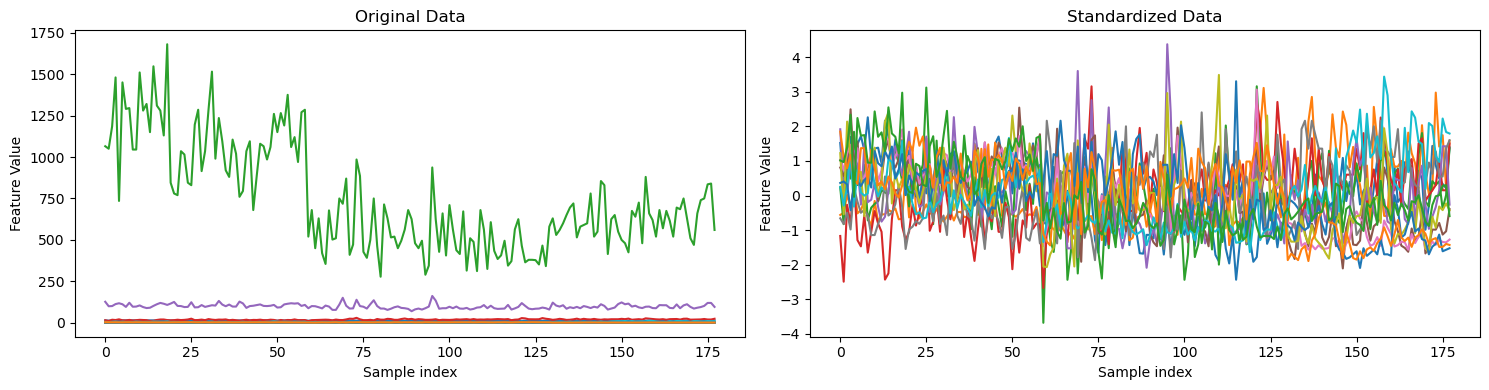

In [19]:
# Visualize original vs. standardized data
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
axes[0].plot(x)
axes[1].plot(x_stand)
axes[0].set_title('Original Data')
axes[0].set_xlabel('Sample index')
axes[0].set_ylabel('Feature Value')
axes[1].set_title('Standardized Data')
axes[1].set_xlabel('Sample index')
axes[1].set_ylabel('Feature Value')
plt.tight_layout()
plt.show()

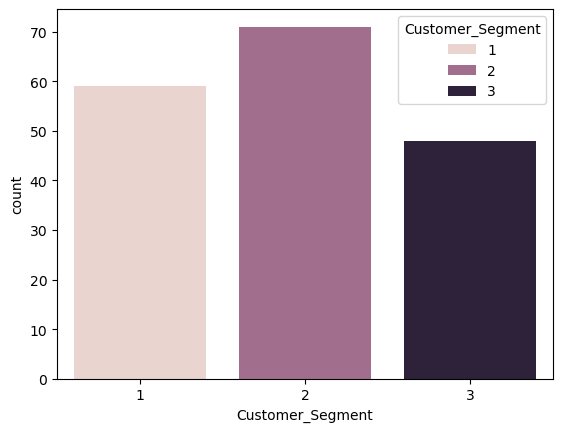

In [21]:
# Plot countplot for Customer Segment
sns.countplot(x='Customer_Segment', data=df, hue='Customer_Segment')
plt.show()

In [27]:
# Apply PCA
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_stand)
df_pca = pd.DataFrame(data=x_pca, columns=['pc1', 'pc2'])
# df_pca['target'] = y

In [29]:
df_pca.head()

,pc1,pc2
0,3.316751,-1.443463
1,2.209465,0.333393
2,2.516740,-1.031151
3,3.757066,-2.756372
4,1.008908,-0.869831


In [31]:
final_wine = pd.concat([df_pca, y], axis=1)
final_wine.head()

,pc1,pc2,Customer_Segment
0,3.316751,-1.443463,1
1,2.209465,0.333393,1
2,2.516740,-1.031151,1
3,3.757066,-2.756372,1
4,1.008908,-0.869831,1


In [33]:
eigenvalues = pca.explained_variance_
print("Eigenvalues (Variance explained by each PC):", eigenvalues)

Eigenvalues (Variance explained by each PC): [4.73243698 2.51108093]


In [35]:
eigenvectors = pca.components_
print("\nEigenvectors (Principal Components):\n\n", eigenvectors)


Eigenvectors (Principal Components):

 [[ 0.1443294  -0.24518758 -0.00205106 -0.23932041  0.14199204  0.39466085
   0.4229343  -0.2985331   0.31342949 -0.0886167   0.29671456  0.37616741
   0.28675223]
 [-0.48365155 -0.22493093 -0.31606881  0.0105905  -0.299634   -0.06503951
   0.00335981 -0.02877949 -0.03930172 -0.52999567  0.27923515  0.16449619
  -0.36490283]]


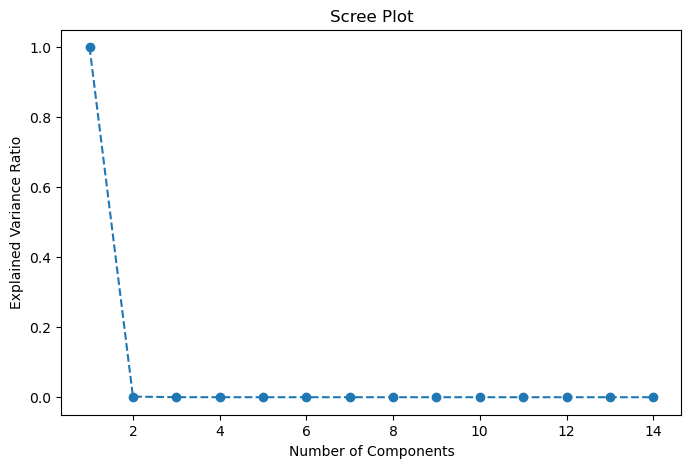

In [23]:
import matplotlib.pyplot as plt

# Fit PCA on the data
pca = PCA().fit(df)
explained_variance = pca.explained_variance_ratio_

# Plot explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.show()


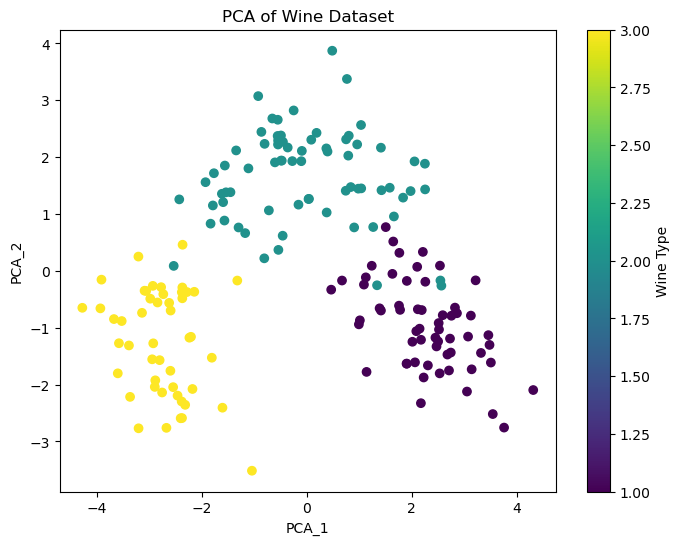

In [43]:
plt.figure(figsize=(8, 6))
plt.scatter(final_wine['pc1'], final_wine['pc2'], c=final_wine["Customer_Segment"], cmap='viridis')
plt.xlabel('PCA_1')
plt.ylabel('PCA_2')
plt.title('PCA of Wine Dataset')
plt.colorbar(label='Wine Type')
plt.show()